# A Machine Learning Workshop: 
## Mastering Classification with Decision Trees  
## Narasio Datafest Online Workshop

# Binary Classification Breakoutroom

### Permasalahan

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Deskripsi Data

1.   Gender: Jenis kelamin pelanggan (Male, Female)
2.   Partner: Status pernikahan pelanggan (yes, no)
3.   Tenure: Lama beralangganan (integer; bulan)
4.   PhoneService: Apakah pelanggan menggunakan telfon (yes, no)
5.   PaperlessBilling:  Apakah pelanggan menggunakan paperless billing (yes, no)
6.   MonthlyCharges: Biaya bulanan (numeric; usd)
7.   Churn: Apakah pelanggan berhenti berlangganan atau tidak (yes, no)

> Dalam kasus ini kita akan melakukan prediksi Churn sebagai variabel respon.




## 1. Import Libraries and Data

IMPORT PACKAGES

In [1]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


In [5]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = '/Belajar/Workshop/Narasio Datafest Workshop/A Machine Learning Mastering Classification Decision Trees/'

IMPORT DATA

In [2]:
# Load data
df= pd.read_csv('TelcoChurn.csv')
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


Dari data diatas maka bisa didapat keterangan bahwa <br>
x = gender, Partner, tenure, PhoneService, PaperlessBilling, MonthlyCharges <br>
y = Churn

## 2. Exploratory Data Analysis (EDA)

In [3]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


Dari info tersebut tidak terdapat missing value. Selanjutnya akan dicari tahu, apakah pelanggan yang berhenti berlangganan lebih banyak dibandingkan yang tidak atau sebaliknya ?

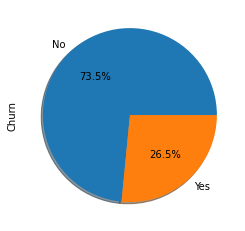

In [4]:
# Mencari perbandingan label/class
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Dari pie-chart tersebut, dapat dikatakan bahwa yang tidak berhenti berlangganan lebih banyak, data ini sedikit tidak seimbang. Untuk mengetahui pastinya saudara dapat menggunakan uji proporsi (untuk memutuskan apakah data seimbang atau tidak).

In [5]:
# Analisa deskriptif
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Dari variabel tenure, pelanggan yang paling loyal adalah 72 bulan, dan rata-rata pelanggan berlangganan adalah 32 bulan. Sedangkan pada variabel monthly charge, tagihan tertinggi di angka 118 usd, dan rata-rata tagihan adalah 64 usd.

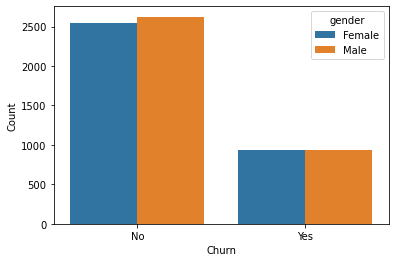

In [6]:
# Buat Crosstab antara Churn dengan Gender
gender_churn = pd.crosstab(df['Churn'], (df['gender']))

# Buat hasil crosstab menjadi dataframe
stacked = gender_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.gender)
plt.show()

Tidak dapat perbedaan yang signifikan dalam hal ini.

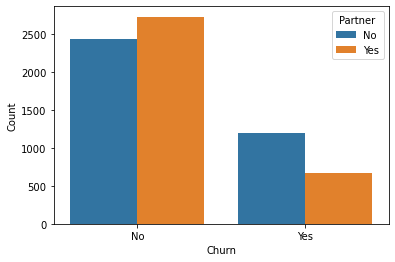

In [7]:
# Buat Crosstab antara Churn dengan Partner
married_churn = pd.crosstab(df['Churn'], (df['Partner']))

# Buat hasil crosstab menjadi dataframe
stacked = married_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.Partner)
plt.show()

Jika dilihat dari barplot crosstab tersebut, pelanggan yang menikah cenderung tidak berhenti berlangganan, sedangkan pelanggan yang tidak menikah cenderung berhenti berlangganan.

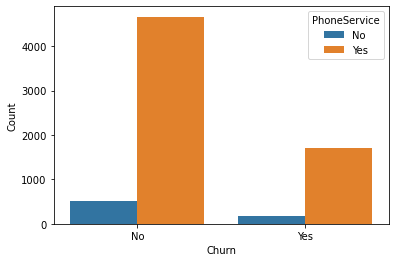

In [8]:
# Buat Crosstab antara Churn dengan PhoneService
ps_churn = pd.crosstab(df['Churn'], (df['PhoneService']))

# Buat hasil crosstab menjadi dataframe
stacked = ps_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.PhoneService)
plt.show()

Pelanggan yang rumahnya terdapat layanan telfon, sebagian besar tidak berhenti berlangganan, tetapi tidak kecil juga pelanggan yang berhenti berlangganan dengan status phone service Yes. Secara keseluruhan, pelanggan dengan layanan telfon dirumahnya cenderung tidak berhenti berlangganan.

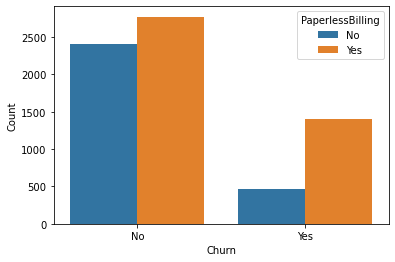

In [9]:
# Buat Crosstab antara Churn dengan PaperlessBilling
pb_churn = pd.crosstab(df['Churn'], (df['PaperlessBilling']))

# Buat hasil crosstab menjadi dataframe
stacked = pb_churn.stack().reset_index().rename(columns={0:'Count'})
sns.barplot(x=stacked.Churn, y=stacked.Count, hue=stacked.PaperlessBilling)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

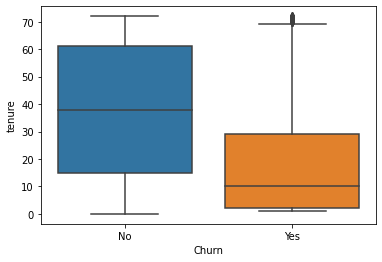

In [10]:
# Boxplot Tenure dengan Churn
sns.boxplot(x="Churn", y="tenure", data=df)

Gambar boxplot tersebut menunjukkan bahwa pelanggan yang berhenti berlangganan mempunyai rata-rata tenure lebih kecil dibandingkan yang tidak berlangganan. Rata-rata pelanggan yang berhenti berlangganan adalah 10 bulan setelah pemakaian pertamanya. Tetapi terdapat juga nilai anomali yaitu pelanggan yang telah berlangganan 70 bulan, namun tetap saja berhenti berlangganan.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

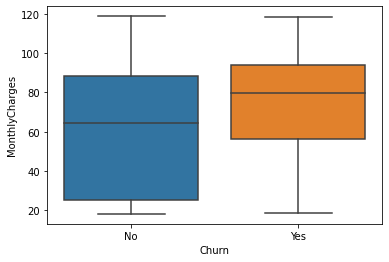

In [11]:
# Boxplot Tenure dengan Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

Gambar boxplot tersebut menunjukkan bahwa semakin tinggi biaya tagihan maka pelanggan mempunyai kecenderungan untuk berhenti berlangganan.

## 3 Preprocessing

Label Encoder

In [12]:
kategori = ['gender','Partner','PhoneService','PaperlessBilling','Churn']
df_cat = df[kategori]
df_cat.head()

,gender,Partner,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,No,Yes,Yes,Yes
3,Male,No,No,No,No
4,Female,No,Yes,Yes,Yes


In [13]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,1,0,34,1,0,56.95,0
2,1,0,2,1,1,53.85,1
3,1,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1


Variabel kategori harus dikoding ulang menjadi sebuah integer numerik supaya dapat dimodelkan kedalam model regresi logistik.

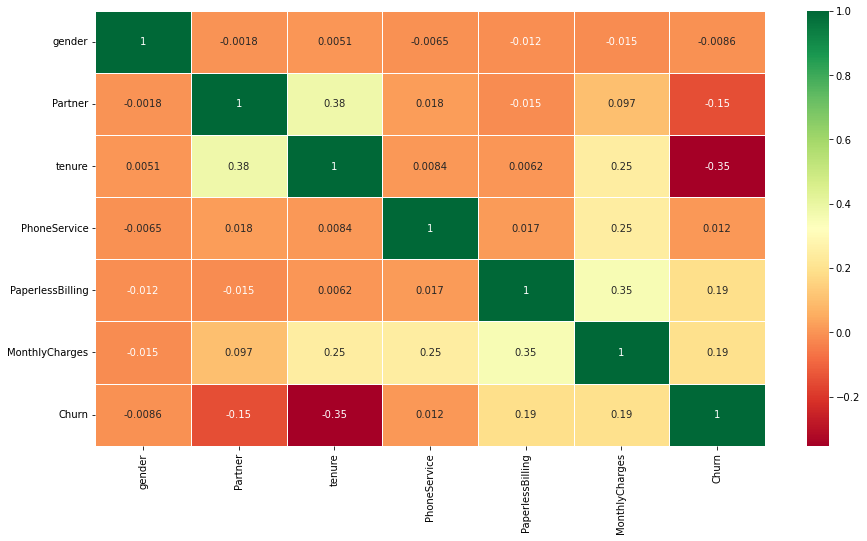

In [14]:
# Cek korelasi, mengasumsikan bahwa data bertime interval-rasio
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

JIka dilihat berdasarkan matriks korelasinya, nilai tertinggi berada diangka lebih dari absolute 0.3, hal tersebut menurut teori, secara umum sudah cukup dikatakan berkorelasi kuat.

## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


Menggunakan data testing berjumlah 30persen dari total data, dan data training berjumlah 70persen dari total data.

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(X_test)
dt_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
dt_test['prediction'] = y_pred
dt_test.head()


,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,1,0,1,24.80,1,1
2715,1,0,41,1,1,25.25,0,1
3825,0,1,52,1,0,19.35,0,0
1807,0,0,1,1,0,76.35,1,1
132,1,0,67,1,0,50.55,0,0


[Text(0.427087457837073, 0.9814814814814815, 'X[2] <= 12.5\ngini = 0.387\nsamples = 4930\nvalue = [3635, 1295]'),
 Text(0.20678647945079248, 0.9444444444444444, 'X[5] <= 66.3\ngini = 0.499\nsamples = 1529\nvalue = [804, 725]'),
 Text(0.11674499324241307, 0.9074074074074074, 'X[2] <= 3.5\ngini = 0.428\nsamples = 845\nvalue = [583, 262]'),
 Text(0.0661936355817668, 0.8703703703703703, 'X[5] <= 20.875\ngini = 0.489\nsamples = 416\nvalue = [239, 177]'),
 Text(0.03532374984641848, 0.8333333333333334, 'X[2] <= 1.5\ngini = 0.396\nsamples = 158\nvalue = [115, 43]'),
 Text(0.021501412949993855, 0.7962962962962963, 'X[5] <= 19.875\ngini = 0.449\nsamples = 106\nvalue = [70, 36]'),
 Text(0.012286521685710775, 0.7592592592592593, 'X[5] <= 19.525\ngini = 0.375\nsamples = 48\nvalue = [36, 12]'),
 Text(0.008846295613711759, 0.7222222222222222, 'X[5] <= 19.425\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.005897530409141172, 0.6851851851851852, 'X[1] <= 0.5\ngini = 0.375\nsamples = 20\nvalue 

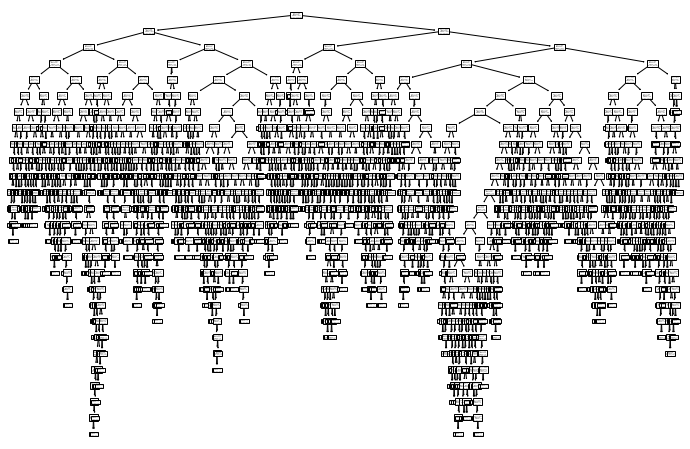

In [19]:
#Cek Decision Tree yang dibuat
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) 

Terlihat bahwa bagan dari Decision Treenya banyak, akan dicoba untuk dilakukan pruning dengan membatasi jumlah kedalaman dari Tree

In [20]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9947
Test set score: 0.7175


In [21]:
acc_dtc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.718409843823947
Confusion Matrix : 
[[1235  304]
 [ 291  283]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1539
           1       0.48      0.49      0.49       574

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113



Sangat terlihat bahwa nilai dari training set score bernilai 1 dimana hal tersebut menandakan model dari Decision Tree mengalami overfitting

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
y_pred_gini = clf_gini.predict(X_test)

In [24]:
!pip install pydotplus

In [25]:
!pip install graphviz

In [26]:
#conda install graphviz 
##jika terjadi kesalahan install "conda install graphviz" ## kemudian restart kernel

^C

Note: you may need to restart the kernel to use updated packages.


In [26]:
import graphviz 
import pydotplus

In [27]:
from graphviz import Source
from sklearn import tree
from subprocess import call

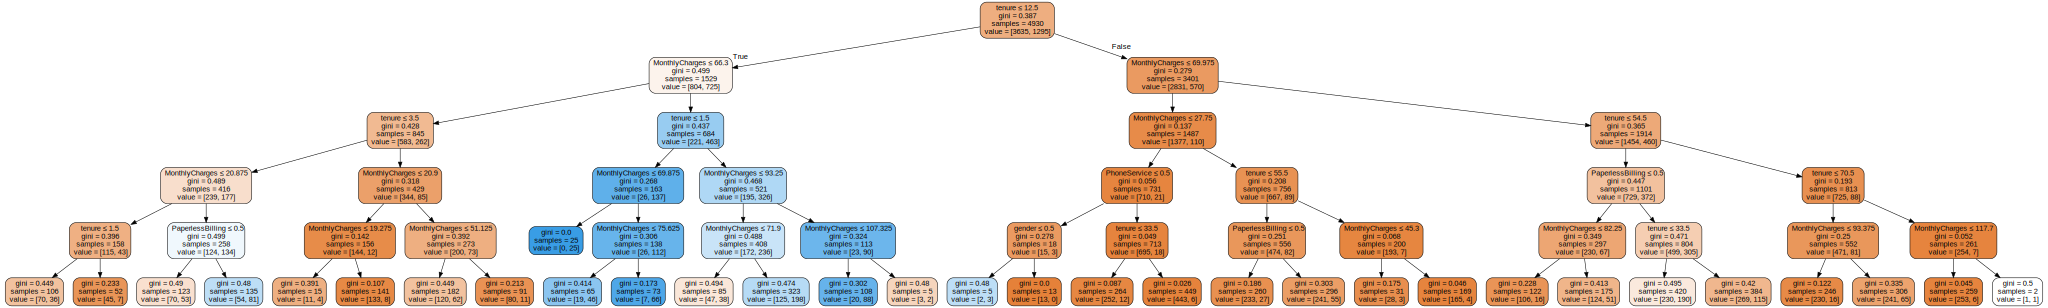

In [29]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,   
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

In [30]:
acc_dtc = accuracy_score(y_test, y_pred_gini)
conf = confusion_matrix(y_test, y_pred_gini)
clf_report = classification_report(y_test, y_pred_gini)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.783719829626124
Confusion Matrix : 
[[1432  107]
 [ 350  224]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1539
           1       0.68      0.39      0.50       574

    accuracy                           0.78      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.78      0.76      2113



In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7941
Test set score: 0.7837


In [32]:
acc_dtc = accuracy_score(y_test, y_pred_gini)
conf = confusion_matrix(y_test, y_pred_gini)
clf_report = classification_report(y_test, y_pred_gini)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.783719829626124
Confusion Matrix : 
[[1432  107]
 [ 350  224]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1539
           1       0.68      0.39      0.50       574

    accuracy                           0.78      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.78      0.76      2113



In [33]:
clf_gini

DecisionTreeClassifier(max_depth=5)